# Projet d'introduction à Maching Learning

## Topic: Prediction des prix medians du logement des quartiers de Boston.

## Context de l'étude

The Boston Housing Dataset is a classic dataset in the field of machine learning and statistics. It contains information collected by the U.S Census Service in 1978 concerning housing in the area of Boston, Massachusetts. This dataset is often used for regression tasks, where the goal is to predict the median value of owner-occupied homes (MEDV) based on various features.

## Problématique de l'étude

Predire le prix médian des maisons dans différents quartiers de Boston en fonction des divers facteurs sociaux économiques.

## Collecte des données


Les données utilisées dans ce travail sont télechargées sur Kaggle et concernent les données sur les logements dans la région de Boston, Massachusetts.

Dans ce notebook nous allons mettre en evidence les differentes étapes de l'implementation du modèle de Maching Learning afin de répondre à noitre problématique.

### Importations des librairies nécessaires

In [25]:
## Importation des libariries néessaires

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from scipy import stats 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

### Importation des données des logements de Boston


Dans cette section nous allons telecharger et  importer notre base de données depuis le site de Kaggle.

In [5]:
!pip install kagglehub

import kagglehub
import pandas as pd
import os

# Download the dataset
path = kagglehub.dataset_download("altavish/boston-housing-dataset")
print("Path to dataset files:", path)


Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\altavish\boston-housing-dataset\versions\1


In [6]:
# Load the dataset into pandas
file_path = os.path.join(path, 'HousingData.csv')  
df = pd.read_csv(file_path)
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


La base de données contients **14 variables** qui sont des caracteristiques des **506** logements de Boston de notre base de données.

Voici la description detaillée de chacune de ces variables.

### Description des variables 

**CRIM**: Per capita crime rate by town

**ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS**: Proportion of non-retail business acres per town

**CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**NOX**: Nitric oxides concentration (parts per 10 million)

**RM**: Average number of rooms per dwelling

**AGE**: Proportion of owner-occupied units built prior to 1940

**DIS**: Weighted distances to five Boston employment centres

**RAD**: Index of accessibility to radial highways

**TAX**: Full-value property-tax rate per $10,000

**PTRATIO**: Pupil-teacher ratio by town

**B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

**LSTAT**: % lower status of the population

**MEDV**: Median value of owner-occupied homes in $1000's (Target variable)

## Data preprocessing

Dans cette section nous allons passer au traitement des données afin de garantir la qualité de la base de données.

### Identification des valeurs manquantes

Dans cette section nous allons calculer la proportion des valeurs manquantes par variables et afficher celles qui pressentes au moins une valeur manquante.

In [8]:
# Calculate the percentage of missing values for each column
missing_values_percentage = df.isnull().sum() * 100 / len(df)

# Filter for columns with at least one missing value
missing_values_percentage = missing_values_percentage[missing_values_percentage > 0]

# Display the results in a table
missing_values_percentage

CRIM     3.952569
ZN       3.952569
INDUS    3.952569
CHAS     3.952569
AGE      3.952569
LSTAT    3.952569
dtype: float64

D'après ce résultat on constate que les variables **CRIM**,**ZN**, **INDUS**, **CHAS**, **AGE**, **LSTAT** sont les celles présentant au moins une valeur manquante et presentent chacune **3.95%** de valeurs manquantes. Ce résulat montre que le nombre de valeurs manquantes par chaque variables est faibles du coup nous allons supprimer  toutes les observations presentant des valeurs manquantes. Cette suuprimer n'aura pas assez d'impact sur nos estimations puisque le nombre de valeurs manquantes est faibles et reste le même pour toutes les variables.

### Traitement des données manquantes

Comme indiqué ci-dessus nous allons passer à la suppression de toutes observations (logements) présentant des valeurs manquantes.

In [9]:
# prompt: Donne moi le code pour supprimer les observations  contenant les observations manquantes.

# Drop rows with any missing values
df = df.dropna()

# Réaffichage des données manquantes par variables

# Calculate the percentage of missing values for each column
missing_values_percentage = df.isnull().sum() * 100 / len(df)

# Filter for columns with at least one missing value
missing_values_percentage = missing_values_percentage[missing_values_percentage > 0]

# Display the results in a table
missing_values_percentage

Series([], dtype: float64)

### Detection des valeurs extrêmes.

Dans cette section, nous allons identifier dans un premier temps les variables contenant des valeurs extrêmes et ensuite passer au traitement de ces valeurs extrêmes. Cette operation se fera sur les variables quantitatives. Notons que la variable **CHAS** n'en fera pas partir de cette opération puiqu'elle est une variable binaire.

C:\Users\USER\AppData\Local\Temp\ipykernel_18088\3122738897.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_18088\3122738897.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_18088\3122738897.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_18088\3122738897.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_18088\3122738897.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_18088\3122738897.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_18088\3122738897.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppDat

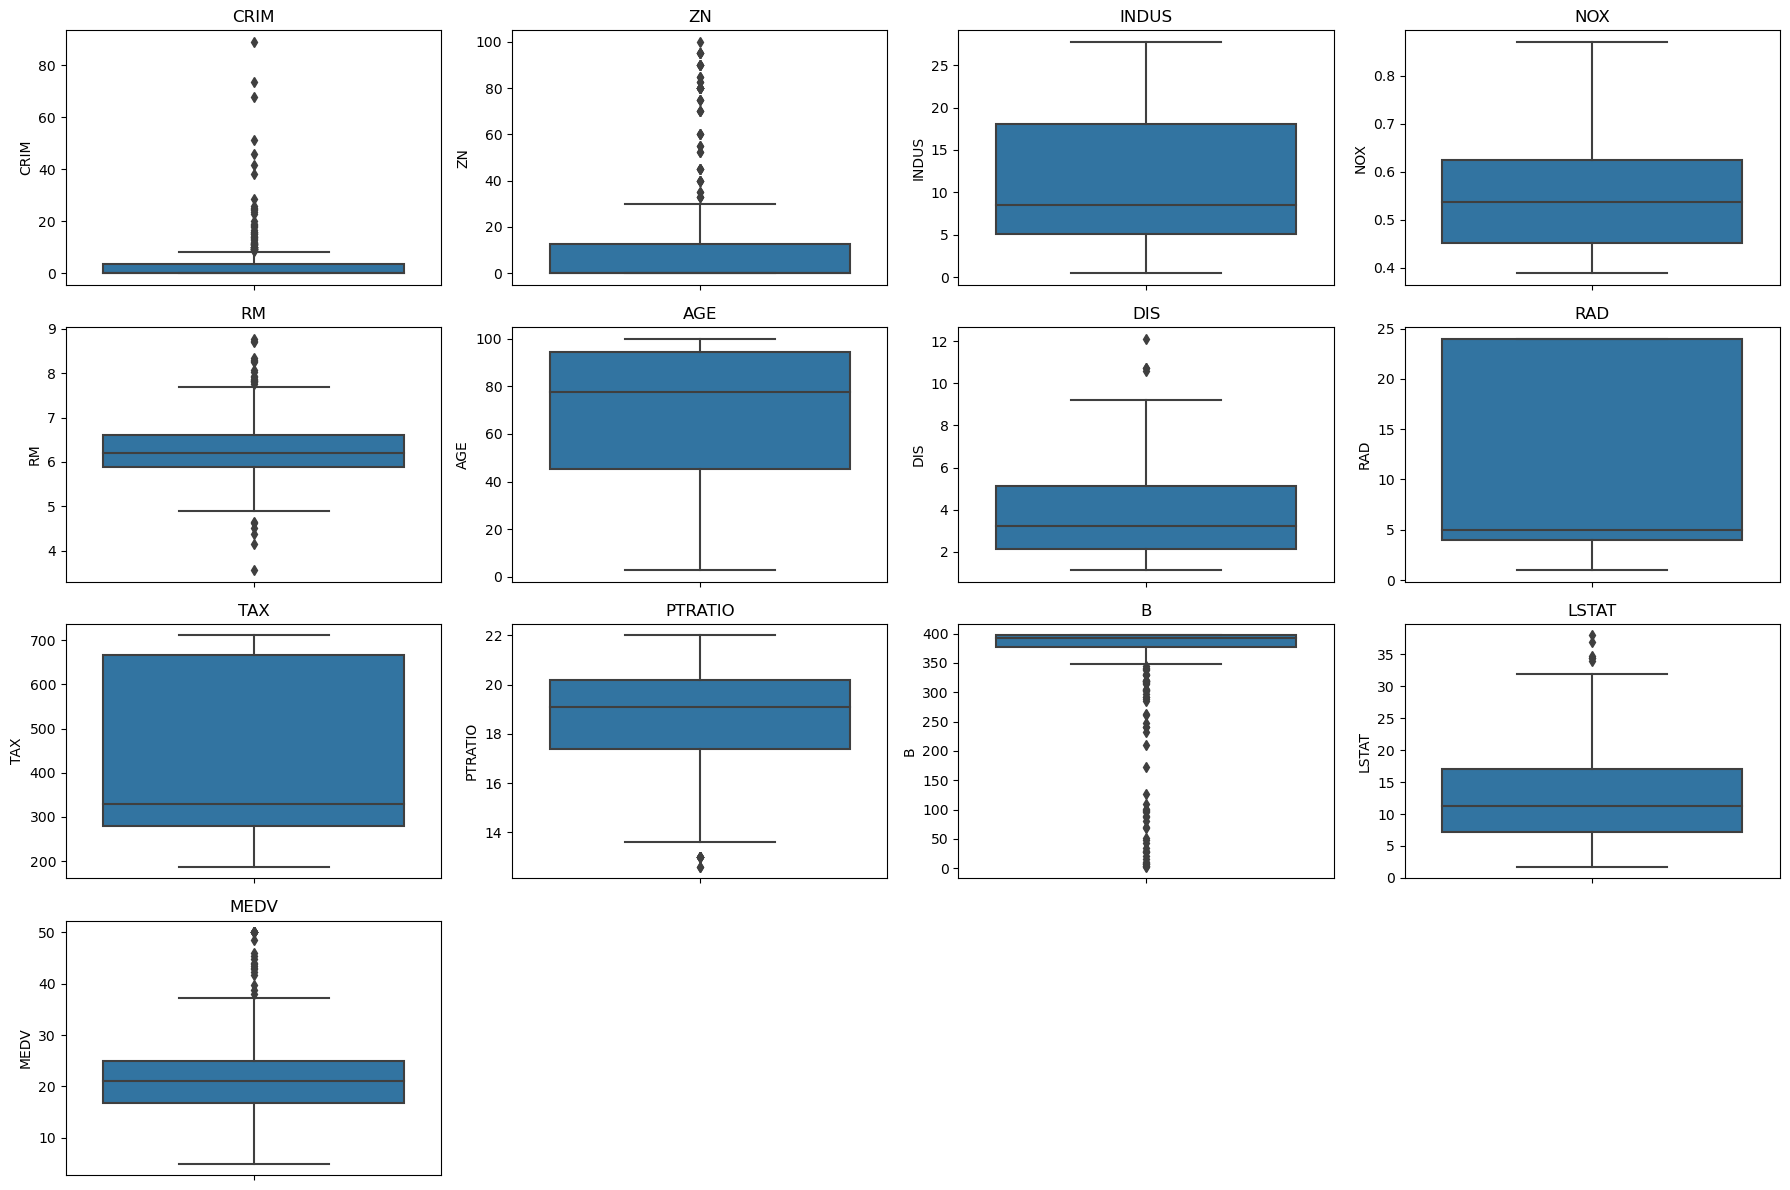

In [10]:
# Select quantitative columns (excluding 'CHAS')
quantitative_cols = df.select_dtypes(include=np.number).columns
quantitative_cols = quantitative_cols.drop('CHAS')


# Create boxplots for each quantitative column
# Increased figure size and adjusted the grid to 4x4 to accommodate 13 plots
plt.figure(figsize=(18, 12))

# Changed grid layout to 4x4
for i, col in enumerate(quantitative_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()


plt.show()


Le résultat ci-dessus montre que seules les variables **NOX**, **TAX**, **RAD** et **AGE** ne  présentent pas de garandes valeurs.
En utilisant le critère d'ecart-interquartile affichons la popportion de valeur manquante par chacune des variables concernées. Par le critère d'ecart interquartile, la données d'une variables est considérée comme extrême lorsque cette dernière n'est pas comprise entre **Q1 - 1.5 * IQR** et **Q3 +1.5 * IQR** avec **Q1**, **Q3** et **IQR** respectivement le premier quartile, le troisième quartile et l'écart interquartile.


Affichages par variables le nombre de grande valeurs.

In [11]:
def iqr_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Iterate through quantitative columns, excluding 'CHAS', 'NOX', 'TAX', and 'RAD'
for col in quantitative_cols.drop(['NOX', 'TAX', 'RAD','AGE','INDUS']):
    outliers = iqr_outliers(df[col])
    proportion_outliers = len(outliers) / len(df) * 100
    print(f"Proportion of outliers in {col}: {proportion_outliers:.2f}%")


Proportion of outliers in CRIM: 13.71%
Proportion of outliers in ZN: 12.69%
Proportion of outliers in RM: 5.84%
Proportion of outliers in DIS: 1.02%
Proportion of outliers in PTRATIO: 3.05%
Proportion of outliers in B: 14.72%
Proportion of outliers in LSTAT: 1.52%
Proportion of outliers in MEDV: 6.60%


### Traitement des valeurs extrêmes

Pour traiter les valeurs extrêmes nous allons utiliser la méthode des **Césures**. Cette méthode consiste imputer pour chauqe variable les données inferieurs à  **Q1 - 1.5 * IQR**  par **Q1 - 1.5 * IQR**  et par **Q3 +1.5 * IQR** celles qui sont supérieures à **Q3 +1.5 * IQR** .

Le code ci-desus nous permet d'utiliser la méthode de **Cesure** pour traiter les valeurs extrêmes.

C:\Users\USER\AppData\Local\Temp\ipykernel_18088\825654499.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_18088\825654499.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_18088\825654499.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_18088\825654499.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_18088\825654499.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_18088\825654499.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_18088\825654499.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\USER\AppData\Local

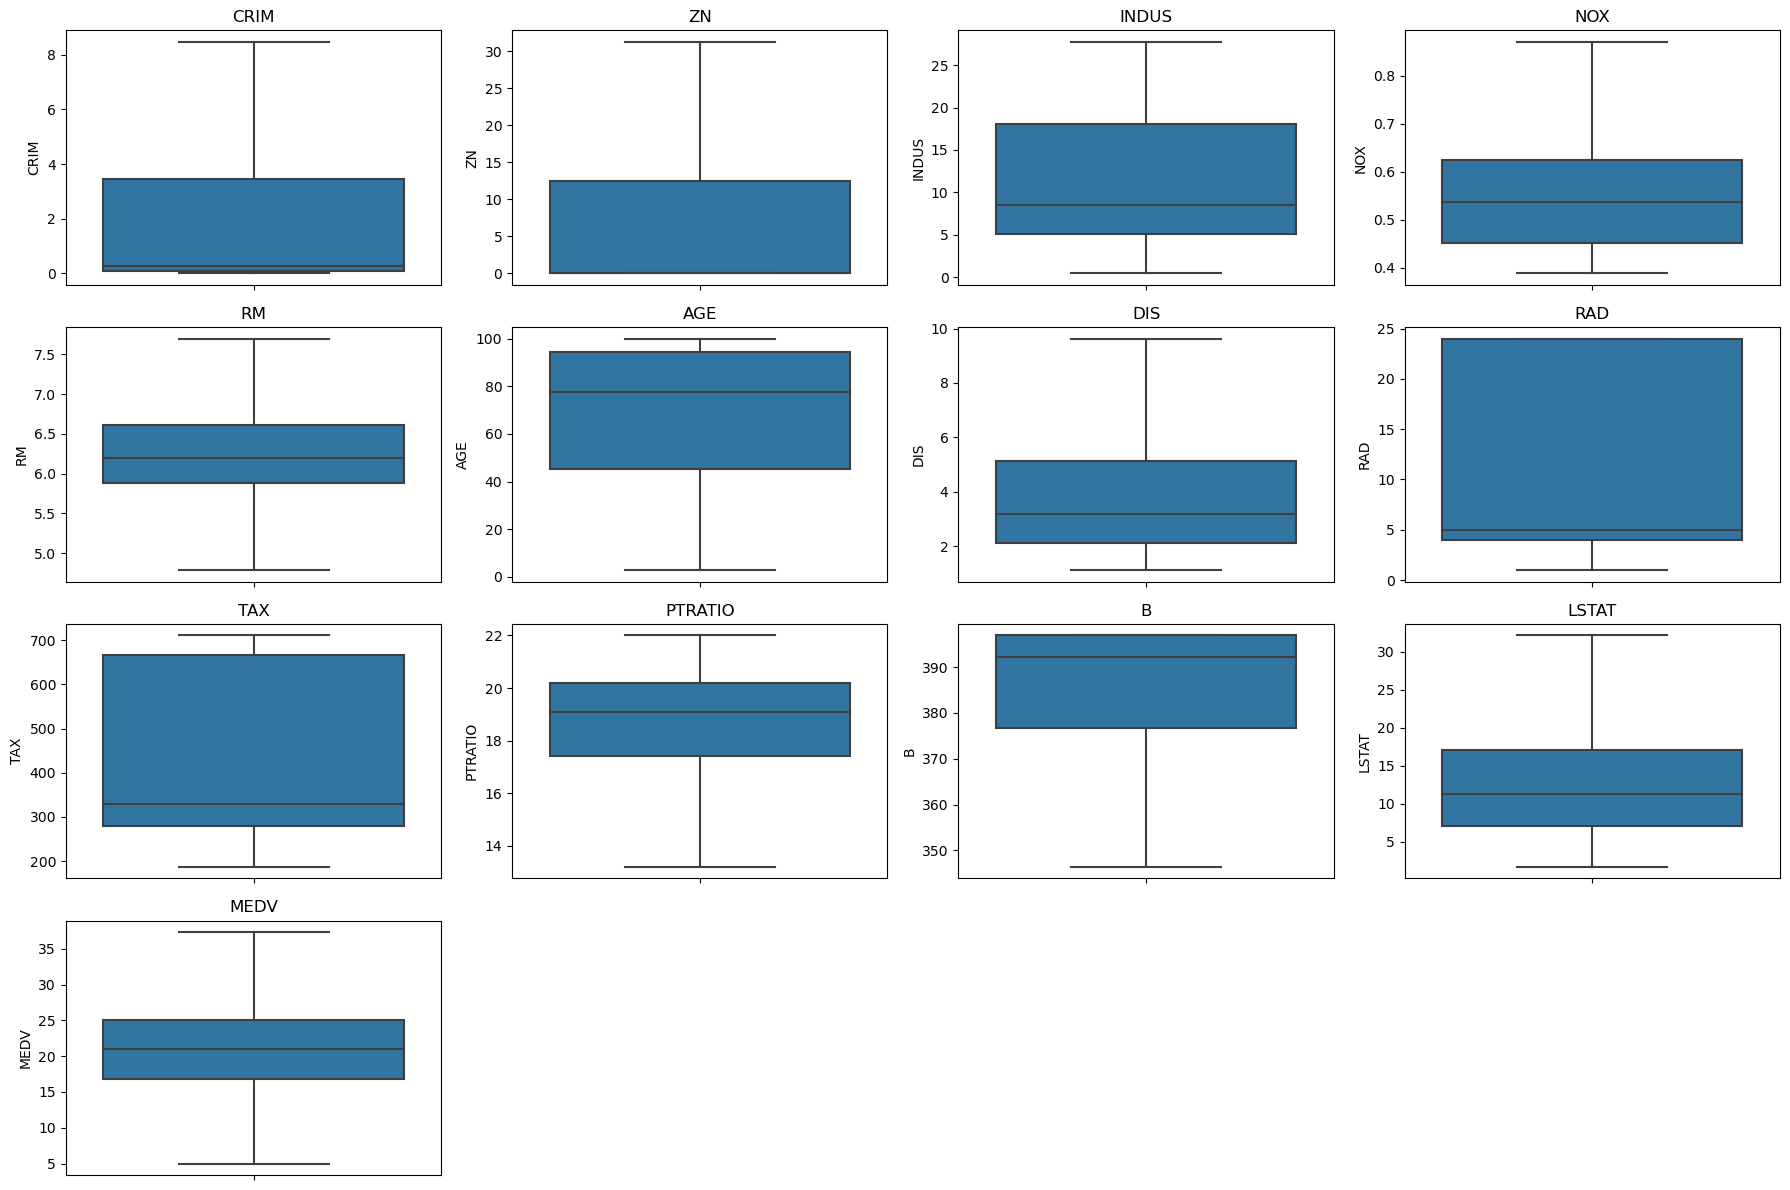

In [12]:
# prompt: Je connais déjà les variables qui présentent des valeurs extrêmes. Donne moi le code pour traiter les valeurs extrêmes des differentes variables.

import matplotlib.pyplot as plt
import numpy as np
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

# Apply capping to the identified columns with outliers
for col in quantitative_cols.drop(['NOX', 'TAX', 'RAD', 'AGE']):
    df = cap_outliers(df, col)

# Now you can proceed with further analysis or modeling
# Example: recreate the boxplots to see the effect of capping
plt.figure(figsize=(18, 12))
for i, col in enumerate(quantitative_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()
plt.show()


 ## Analyse exploratoire des données.

Maintenant que la base de données est propre nous allons passer à quelques analyses statisques pour mieux comprendre la base de données avec de passer à la construction de nos differentes modèles de prediction. Avant d'aller plus loin dans la visaualisation de nos données nous présenterons la statistique descriptive.


In [13]:
# Descriptive statistic of the quantitative variables.
# Select all columns except 'CHAS'
columns_to_describe = df.drop('CHAS', axis=1).columns

# Generate descriptive statistics for the selected columns
descriptive_stats = df[columns_to_describe].describe()

# Display the descriptive statistics
descriptive_stats

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,2.097153,6.786802,11.000863,0.553215,6.268411,68.932741,3.790988,9.403553,406.431472,18.545685,382.845197,12.718648,21.769543
std,3.113796,11.842528,6.908364,0.113112,0.626806,27.888705,2.052534,8.633451,168.312419,2.145626,18.285055,7.159061,7.694407
min,0.006320,0.000000,0.460000,0.389000,4.789875,2.900000,1.129600,1.000000,187.000000,13.200000,346.418750,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,8.466999,31.250000,27.740000,0.871000,7.694875,100.000000,9.626600,24.000000,711.000000,22.000000,396.900000,32.106250,37.300000


La variable **CHAS** est une varaible qualitative prenant la valeur **1** si le quatier dans lequel se trouve le logement est bordée par la rivière et **0** si non. Voici ci-desus la visulisation de cette variable.

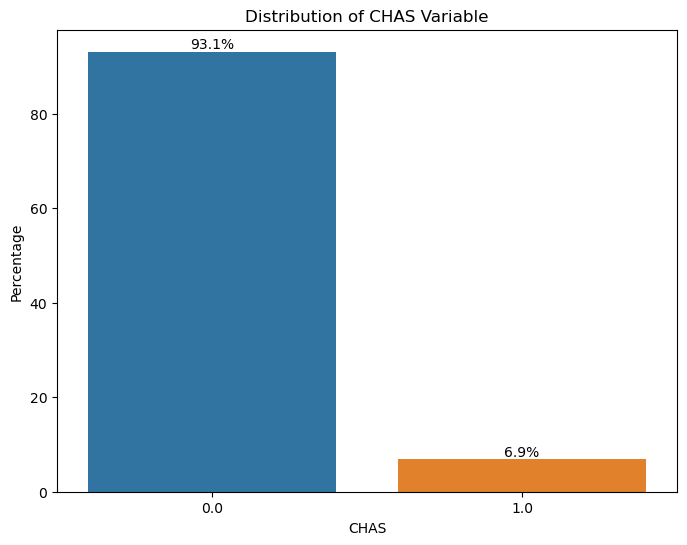

In [14]:
# Calculate the percentage of each modality for the 'CHAS' variable
chas_percentage = df['CHAS'].value_counts(normalize=True) * 100

# Create the barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=chas_percentage.index, y=chas_percentage.values)
plt.xlabel('CHAS')
plt.ylabel('Percentage')
plt.title('Distribution of CHAS Variable')

# Add percentage labels on top of each bar
for i, v in enumerate(chas_percentage.values):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.show()

Le graphique ci-dessus montre que seulement **6.9%** des logements des quartiers de Boston sont bordés par la rivières.

### La distribution des variables quantitatives.

Dans cette section nous allons visuliser la la distribution des variables quantitatives.

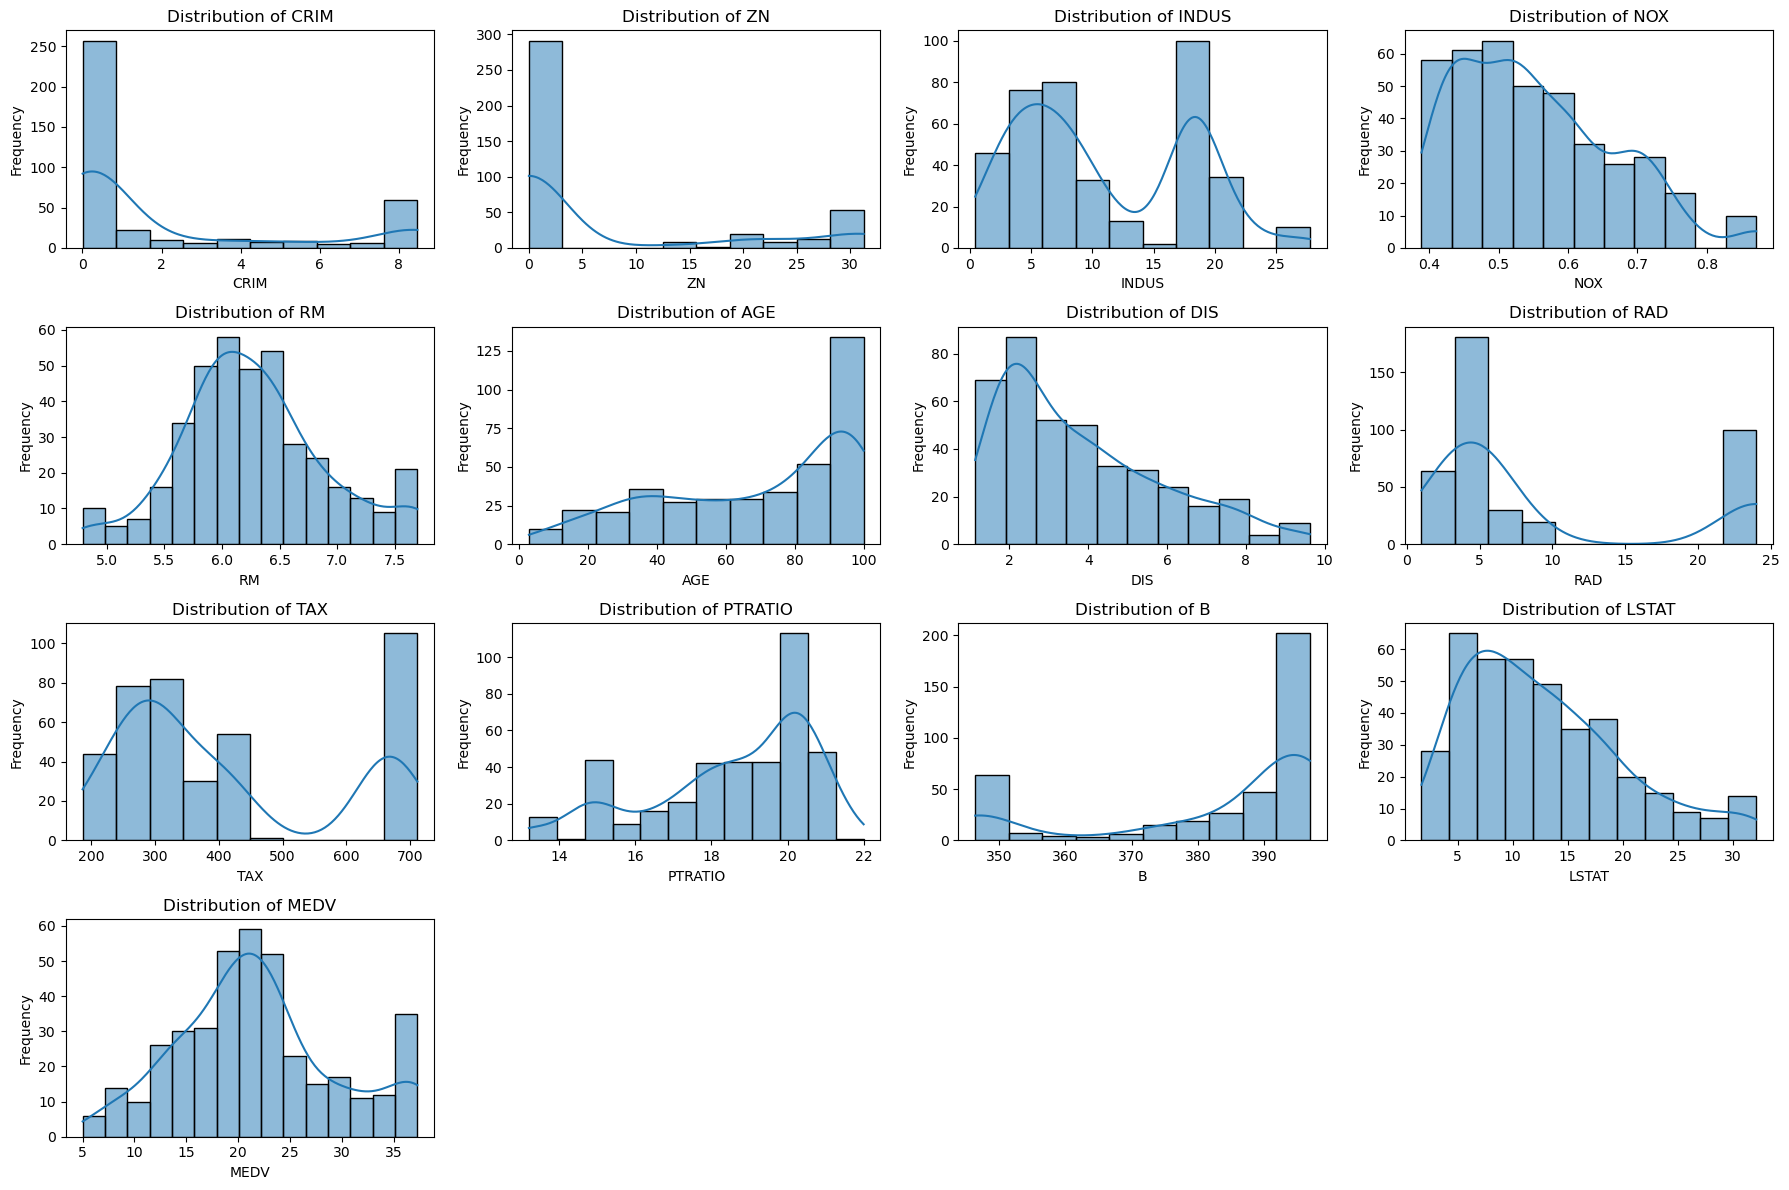

In [16]:
# Create histograms with density curves for quantitative variables
# Assuming quantitative_cols has 13 elements (as in your previous code)
fig, axes = plt.subplots(4, 4, figsize=(18, 12))  # Create a 4x4 grid of subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through quantitative columns and create histograms
for i, col in enumerate(quantitative_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])  # Plot on the corresponding subplot
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots (if quantitative_cols has less than 16 elements)
for i in range(len(quantitative_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

L'analyse de la distribution des differentes quantitatives montre que seules les variables **MEDV** et **RM** présentent une distribution normale. Du coup, pour faciliter l'interpretabilité de nos modèles nous allons considerer le logarithme népérien des autres variables ne presentant pas une distribution normale pour la mise en echelle des variables.


La variable **CHAS** est une variable qualitative, afin d'étudier sa correlation avec **MEDV** nous allons produireson **boxplot** en fonction de **MEDV**. Voici le code pouvant nous permettre de faire ce graphique.

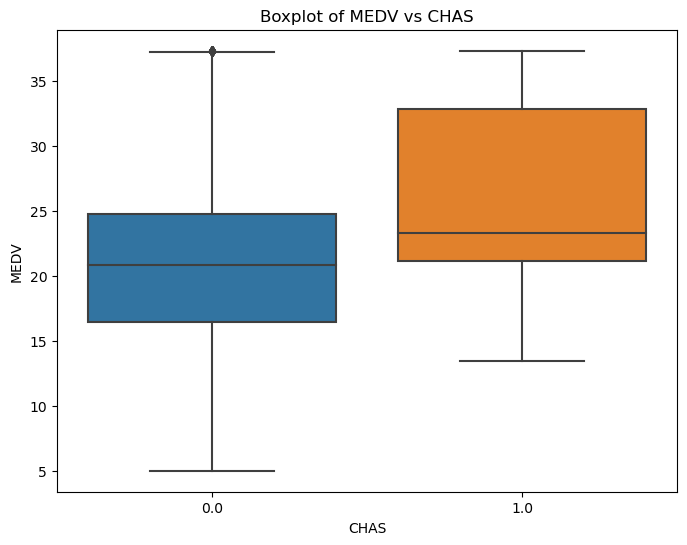

In [17]:
## Boxplot of the CHAS

plt.figure(figsize=(8, 6))
sns.boxplot(x='CHAS', y='MEDV', data=df)
plt.title('Boxplot of MEDV vs CHAS')
plt.xlabel('CHAS')
plt.ylabel('MEDV')
plt.show()

L'analyse des boîtes à moustaches de chacune des modalités de **CHAS** montre qu'il y a en moyenne une difference entre le prix median des logements bordés par la rivière et les autres. Ce résultat peut signifier que la variable **CHAS** pourrait expliquer le prix median des logements du quartier du Boston.

## Selection des varaibles pouvant expliquer le prix median des logements

Dans cette section nous allons produire la matrice des correlations entre toutes les variables quantitatives.
Ici nous considerons qu'une variable pourrait expliquer le prix median des logements lorsque le coefficient de corrélation entre cette variable et **MEDV** est superieure à **50%** en valeur absolue. Voici ci-dessus le code permettant de produire cette matrice de correlation enetre les variables.

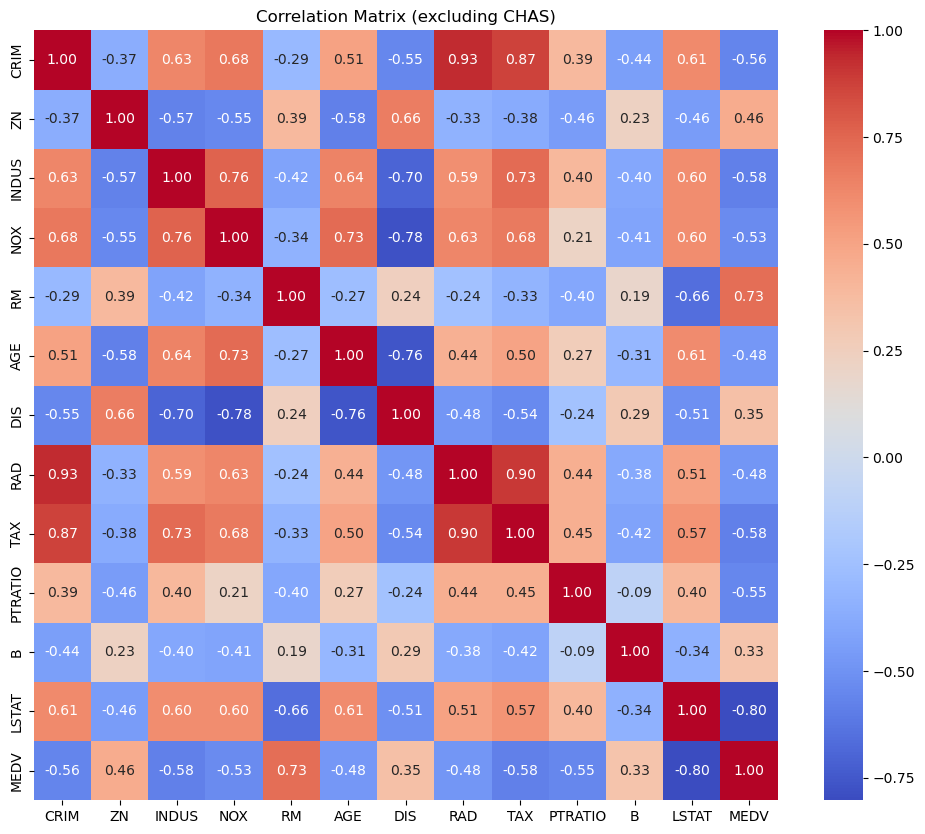

In [18]:
# Select all columns except 'CHAS'
columns_for_heatmap = df.drop('CHAS', axis=1).columns

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[columns_for_heatmap].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (excluding CHAS)')
plt.show()

D'apès les résultats de cette matrice de correlation les variables **CRIM, INDUS, NOX, RM, TAX, PTRATIO, LSTAT**ont tous une corrélation superieure à **0.5** en valeur absolue avec **MEDV**. Ainsi, ces variables pourraient donc expliquer le prix median des logements de Boston.

C:\Users\USER\ANA3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


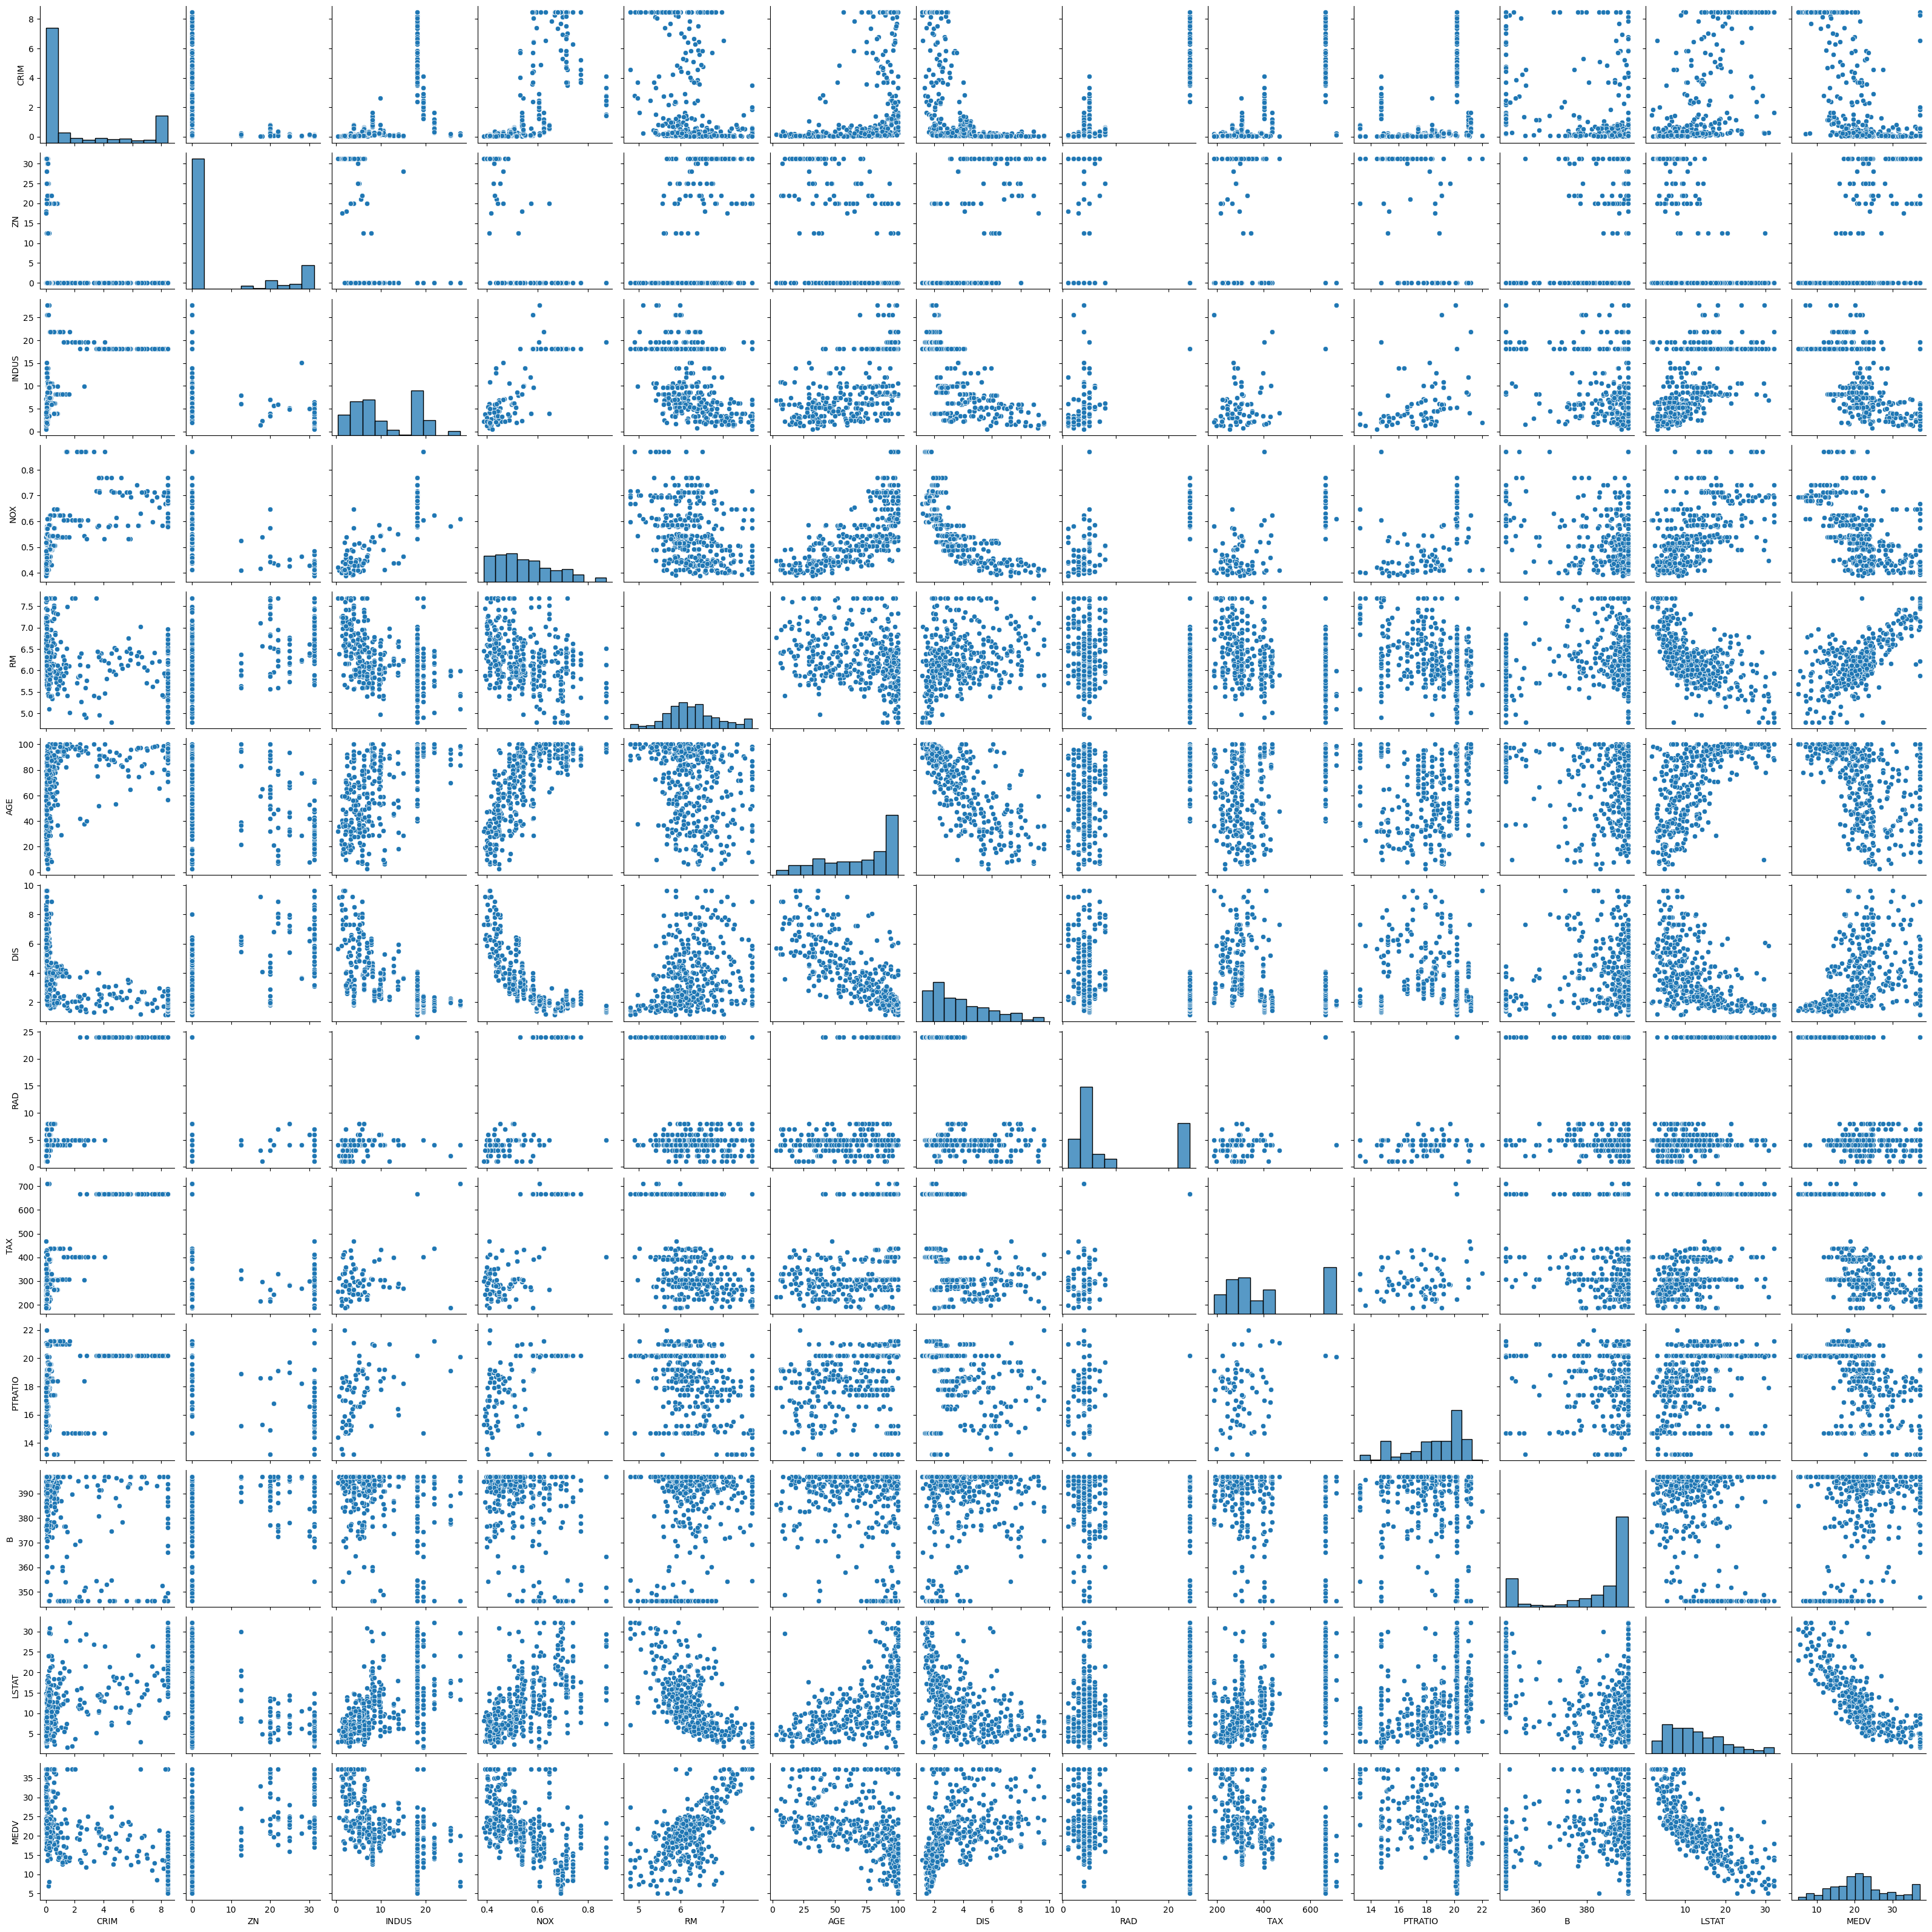

In [19]:
# Select quantitative columns (excluding 'CHAS')
quantitative_cols = df.select_dtypes(include=np.number).columns
quantitative_cols = quantitative_cols.drop('CHAS')

# Create a pairplot to visualize relationships between quantitative variables
sns.pairplot(df[quantitative_cols])
plt.show()


Ce nuage de points representées entre toutes les variables peuvent également nous servir pour l'identification des variables pouvant expliquer le prix median des logements du quartier de Boston. Ce nuage nous permet de confirmer encore les variables suceptibles d'expliquer le prix median des logements  identifiées par le calcul de la matrice de correlation.

## Modèle pour la prédiction du prix médian des logements.

Pour prédire le prix median des logements de manière efficace nous allons implementer successivement le modèle de **Regression Linéaire, SVM (Support Vector Maching) et la Forêt aléatoire**.
Mais avant nous allons passe à la validation croisée afin de créer nos données de tests et d'entrainement.

### Validation croisée

Dans ce travail nous supposons que **70%** de nos données seront utilisées pour l'entrainement des modèles et les **30%** restant dans les données de test.

Notre variable dependante est **MEDV** et les variables explicatives sont celles qui sont identifiées par la matrice de corrélation. Du coup, les variables explications sont: **CRIM, INDUS, NOX,RM, TAX, PTRATIO, LSTAT**.

Mais nous allons mettre toutes les données sur une meême échelle afin de garantir l'interpretabilité de nos données. Voici le code pour effectuer cette conversion.

In [21]:

# Create new variables with the natural logarithm of quantitative variables and the dependent variable
for col in ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']:
    df['log_' + col] = np.log(df[col])



# Define features (X) and target (y)
X = df[['log_CRIM', 'log_INDUS', 'log_NOX', 'log_RM', 'log_TAX', 'log_PTRATIO', 'log_LSTAT','CHAS']]
y = df['log_MEDV']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test


C:\Users\USER\ANA3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


 ### Modèle de Regression Linéaire.
 
Après l'implemenation de chaque modèle nous allons utiliser les metriques suivantes: **R carré, MAE, RMSE,MSE** pour l'évalauation de sa performance.

In [26]:
# Initialize and train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_reg.predict(X_test)

# Evaluation du modèle de regression linéaire.
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print(f"RMSE: {rmse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_linear)
print(f"MAE: {mae}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred_linear)
print(f"R-squared: {r2}")

# Calculate MSE
mse = mean_squared_error(y_test, y_pred_linear)
print(f"MSE: {mse}")

RMSE: 0.20357086295120097
MAE: 0.15292359910247819
R-squared: 0.6674507813077268
MSE: 0.041441096242696644


Pour l'évaluation de chacun des modèles nous allons essentiellemnt utiliser les metriques suivantes: **R carré, MAE, RMSE,MSE**.

## Support Vector Machine (SVM)

In [27]:
# Initialize and train the SVR model
svr_model = SVR(kernel='linear')  # You can experiment with different kernels
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the SVR model
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
print(f"SVR RMSE: {rmse_svr}")

mae_svr = mean_absolute_error(y_test, y_pred_svr)
print(f"SVR MAE: {mae_svr}")

r2_svr = r2_score(y_test, y_pred_svr)
print(f"SVR R-squared: {r2_svr}")

mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"SVR MSE: {mse_svr}")


SVR RMSE: 0.19742394405894226
SVR MAE: 0.1444310963499033
SVR R-squared: 0.6872305372051695
SVR MSE: 0.03897621368778836


## Random Forest

In [28]:

# Initialize and train the Random Forest Regressor model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42) # You can tune n_estimators
rf_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf}")

mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest MAE: {mae_rf}")

r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R-squared: {r2_rf}")

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")

Random Forest RMSE: 0.13697564059641273
Random Forest MAE: 0.09534016361837303
Random Forest R-squared: 0.8494393860999687
Random Forest MSE: 0.018762326116797633


### Tableau recaputulatif des metriques de performances pour chacun des modèles.

In [30]:
# Create a dictionary to store the metrics for each model
model_metrics = {
    'Linear Regression': {
        'RMSE': rmse,
        'MAE': mae,
        'R-squared': r2,
        'MSE': mse
    },
    'SVR': {
        'RMSE': rmse_svr,
        'MAE': mae_svr,
        'R-squared': r2_svr,
        'MSE': mse_svr
    },
    'Random Forest': {
        'RMSE': rmse_rf,
        'MAE': mae_rf,
        'R-squared': r2_rf,
        'MSE': mse_rf
    }
}

# Create a pandas DataFrame from the dictionary
metrics_df = pd.DataFrame(model_metrics).T  # Transpose to have models as rows

# Display the DataFrame as a table
print(metrics_df)

                       RMSE       MAE  R-squared       MSE
Linear Regression  0.203571  0.152924   0.667451  0.041441
SVR                0.197424  0.144431   0.687231  0.038976
Random Forest      0.136976  0.095340   0.849439  0.018762


De tous les resultats ci-dessus le modèle de **forêt aleatoire** presente des meilleurs performances par rapport aux autres modèles. Ainsi, donc nous allons utiliser ce modèle pour predire les prix medians des logements de Boston.

## Prédiction du prix médian d'un logement à part.

In [35]:
def predict_house_price():
    """Gets user input for housing features and predicts the median price."""

    print("Enter the following housing features:")
    try:
        crim = float(input("CRIM (per capita crime rate): "))
        indus = float(input("INDUS (proportion of non-retail business acres): "))
        nox = float(input("NOX (nitric oxides concentration): "))
        rm = float(input("RM (average number of rooms): "))
        tax = float(input("TAX (full-value property-tax rate): "))
        ptratio = float(input("PTRATIO (pupil-teacher ratio): "))
        lstat = float(input("LSTAT (% lower status of the population): "))
        chas = float(input("CHAS: "))
    except ValueError:
        print("Invalid input. Please enter numeric values.")
        return

    # Create a DataFrame for the user's input
    user_input = pd.DataFrame({
        'log_CRIM': [np.log(crim)],
        'log_INDUS': [np.log(indus)],
        'log_NOX': [np.log(nox)],
        'log_RM': [np.log(rm)],
        'log_TAX': [np.log(tax)],
        'log_PTRATIO': [np.log(ptratio)],
        'log_LSTAT': [np.log(lstat)],
        'CHAS': [chas]
    })

    # Make a prediction and take the exponential
    predicted_log_price = rf_reg.predict(user_input)[0]
    predicted_price = np.exp(predicted_log_price)  # Convert back to original scale

    print(f"\nPredicted Median House Price: ${predicted_price:.2f}")  # Display in dollars

# Run the prediction function
predict_house_price()

Enter the following housing features:
CRIM (per capita crime rate): 25
INDUS (proportion of non-retail business acres): 47
NOX (nitric oxides concentration): 62
RM (average number of rooms): 32
TAX (full-value property-tax rate): 45
PTRATIO (pupil-teacher ratio): 42
LSTAT (% lower status of the population): 25
CHAS: 0

Predicted Median House Price: $10.68
